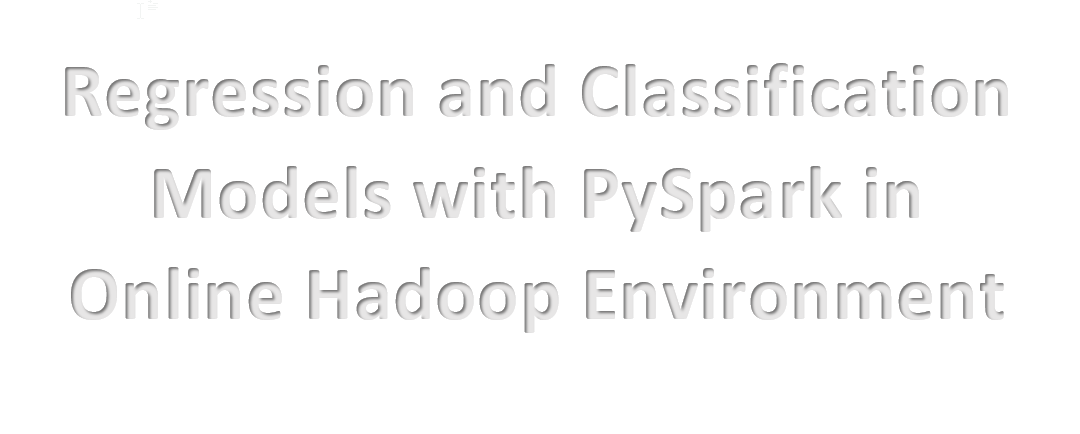

In [1]:
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")


In [2]:
from pyspark.sql import SparkSession


In [3]:
spark= SparkSession.builder.appName("Random Forest Regression and classification").getOrCreate()
spark

In [4]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.regression import *
from pyspark.ml.evaluation import *
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [5]:
df = spark.read.csv('Data/regression_pyspark.csv', inferSchema=True, header=True)

In [6]:
df.limit(10).toPandas()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Life expectancy
0,0,15,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,65.0
1,0,14,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,59.9
2,0,13,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,59.9
3,0,12,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,59.5
4,0,11,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,59.2
5,0,10,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,1,58.8
6,0,9,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,1,58.6
7,0,8,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,1,58.1
8,0,7,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,1,57.5
9,0,6,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,1,57.3


In [7]:
df.printSchema()

root
 |-- Country: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Adult Mortality: double (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: double (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : double (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)
 |-- Status_Developing: integer (nullable = true)
 |-- Life expectancy : double (nullable = true)



In [8]:
print(df.count())
print(len(df.columns))

2938
22


In [9]:
df.columns

['Country',
 'Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developing',
 'Life expectancy ']

In [10]:
input_columns = ['Country',
 'Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developing']

In [11]:
dependent_var = 'Life expectancy '

In [12]:
assembler = VectorAssembler(inputCols=input_columns, outputCol="features")
feature_vec=assembler.transform(df).select('features',dependent_var)
feature_vec.show(5)

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[0.0,15.0,263.0,6...|            65.0|
|[0.0,14.0,271.0,6...|            59.9|
|[0.0,13.0,268.0,6...|            59.9|
|[0.0,12.0,272.0,6...|            59.5|
|[0.0,11.0,275.0,7...|            59.2|
+--------------------+----------------+
only showing top 5 rows



In [13]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.80,.20],seed=0)

In [14]:
from pyspark.ml.regression import RandomForestRegressor
r_model = RandomForestRegressor(labelCol=dependent_var, featuresCol="features",  
                        maxDepth=15, minInfoGain=0.001, seed=0, numTrees=110)
rfModel = r_model.fit(train_data)

#Evaulation of the Model
predictions = rfModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol=dependent_var,metricName='r2')
evaluator.evaluate(predictions)


0.9628827489068111

In [15]:
evaluator_RMSE = RegressionEvaluator(labelCol=dependent_var,metricName='rmse')
evaluator_RMSE.evaluate(predictions)

1.9108899342203498

In [16]:
evaluator_MSE = RegressionEvaluator(labelCol=dependent_var,metricName='mse')
evaluator_MSE.evaluate(predictions)

3.6515003407046525

In [17]:
evaluator_MAE = RegressionEvaluator(labelCol=dependent_var,metricName='mae')
evaluator_MAE.evaluate(predictions)

1.1800372208612373

In [18]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
g_model = RandomForestRegressor(labelCol=dependent_var, featuresCol="features",  
                        minInfoGain=0.001, seed=0)
paramGrid = (ParamGridBuilder()\
             .addGrid(g_model.maxDepth,[14,15,16])\
             .addGrid(g_model.numTrees,[100,110,120])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=g_model, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)

In [19]:
#Get the best model
rf_bestModel = cvModel.bestModel

In [20]:
# Feature Importance
# Estimate of the importance of each feature
# Each feature's importance is the average of its importance across all trees
# In the ensemble the importance vector is normalized to sum up to 1.
print(" ")
print('\033[1m' + "Feature Importance"+ '\033[0m')
print("(Scores Up to 1)")
print("Lowest score signifies the least importance")
print(" ")
RF_FeatureImportance = rf_bestModel.featureImportances.toArray()
#Convert from numpy array to list
important_scores = []
for x in RF_FeatureImportance:
    important_scores.append(float(x))
    
# Then zip with input_columns list and create a df
result_is = spark.createDataFrame(zip(input_columns, important_scores), schema=['feature', 'score'])
print(result_is.orderBy(result_is["score"].desc()).show(truncate=False))

# Make predictions
# PySpark will automatically use the best model when we call fitmodel
predictions_fn = cvModel.transform(test_data)

# Then let us apply it

r2_rf_pys = evaluator.evaluate(predictions_fn)
print(r2_rf_pys)

 
Feature Importance
(Scores Up to 1)
Lowest score signifies the least importance
 
+-------------------------------+--------------------+
|feature                        |score               |
+-------------------------------+--------------------+
| HIV/AIDS                      |0.2800681489734736  |
|Income composition of resources|0.2309916068868801  |
|Adult Mortality                |0.18060409546748368 |
|Schooling                      |0.07423916165506116 |
| BMI                           |0.053087054092978994|
|under-five deaths              |0.02477786961574394 |
| thinness 5-9 years            |0.02409517636340881 |
|Polio                          |0.019811351173397523|
|infant deaths                  |0.01950250606779067 |
| thinness  1-19 years          |0.015634094141502086|
|Diphtheria                     |0.010932942980514851|
|Status_Developing              |0.010286727902517214|
|Alcohol                        |0.009666914147932975|
|Year                           |0.0

In [23]:
df_spc = spark.read.csv('Data/classification_pyspark.csv',inferSchema=True, header=True)

In [24]:
df_spc.limit(10).toPandas()

,age,type_employer,fnlwgt,education_num,marital,sex,capital_gain,capital_loss,hr_per_week,income,...,relationship_Unmarried,relationship_Wife,country_Europe,country_Latin.and.South.America,country_North.America,country_South,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,2,77516,13,1,1,2174,0,40,0,...,0,0,0,0,1,0,0,0,0,1
1,50,1,83311,13,0,1,0,0,13,0,...,0,0,0,0,1,0,0,0,0,1
2,38,0,215646,9,2,1,0,0,40,0,...,0,0,0,0,1,0,0,0,0,1
3,53,0,234721,7,0,1,0,0,40,0,...,0,0,0,0,1,0,0,1,0,0
4,28,0,338409,13,0,0,0,0,40,0,...,0,1,0,1,0,0,0,1,0,0
5,37,0,284582,14,0,0,0,0,40,0,...,0,1,0,0,1,0,0,0,0,1
6,49,0,160187,5,0,0,0,0,16,0,...,0,0,0,1,0,0,0,1,0,0
7,52,1,209642,9,0,1,0,0,45,1,...,0,0,0,0,1,0,0,0,0,1
8,31,0,45781,14,1,0,14084,0,50,1,...,0,0,0,0,1,0,0,0,0,1
9,42,0,159449,13,0,1,5178,0,40,1,...,0,0,0,0,1,0,0,0,0,1


In [25]:
df_spc.printSchema()

root
 |-- age: integer (nullable = true)
 |-- type_employer: integer (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- marital: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hr_per_week: integer (nullable = true)
 |-- income: integer (nullable = true)
 |-- occupation_Armed-Forces: integer (nullable = true)
 |-- occupation_Craft-repair: integer (nullable = true)
 |-- occupation_Exec-managerial: integer (nullable = true)
 |-- occupation_Farming-fishing: integer (nullable = true)
 |-- occupation_Handlers-cleaners: integer (nullable = true)
 |-- occupation_Machine-op-inspct: integer (nullable = true)
 |-- occupation_Other-service: integer (nullable = true)
 |-- occupation_Priv-house-serv: integer (nullable = true)
 |-- occupation_Prof-specialty: integer (nullable = true)
 |-- occupation_Protective-serv: integer (nullable = 

In [26]:
print(df_spc.count())
print(len(df_spc.columns))

30139
36


In [27]:
df_spc.columns

['age',
 'type_employer',
 'fnlwgt',
 'education_num',
 'marital',
 'sex',
 'capital_gain',
 'capital_loss',
 'hr_per_week',
 'income',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'country_Europe',
 'country_Latin.and.South.America',
 'country_North.America',
 'country_South',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White']

In [29]:
df_spark = df_spc.toDF('age','type_employer','fnlwgt','education_num','marital','sex','capital_gain', 'capital_loss', 'hr_per_week','label',
 'occupation_Armed_Forces', 'occupation_Craft_repair','occupation_Exec_managerial', 'occupation_Farming_fishing',
 'occupation_Handlers_cleaners', 'occupation_Machine_op_inspct', 'occupation_Other_service', 'occupation_Priv_house_serv',
 'occupation_Prof_specialty', 'occupation_Protective_serv', 'occupation_Sales', 'occupation_Tech_support',
 'occupation_Transport_moving', 'relationship_Not_in_family', 'relationship_Other_relative', 'relationship_Own_child',
 'relationship_Unmarried', 'relationship_Wife', 'country_Europe', 'country_Latin_and_South_America', 'country_North_America',
 'country_South', 'race_Asian_Pac_Islander', 'race_Black', 'race_Other', 'race_White')

In [30]:
df_spark.columns

['age',
 'type_employer',
 'fnlwgt',
 'education_num',
 'marital',
 'sex',
 'capital_gain',
 'capital_loss',
 'hr_per_week',
 'label',
 'occupation_Armed_Forces',
 'occupation_Craft_repair',
 'occupation_Exec_managerial',
 'occupation_Farming_fishing',
 'occupation_Handlers_cleaners',
 'occupation_Machine_op_inspct',
 'occupation_Other_service',
 'occupation_Priv_house_serv',
 'occupation_Prof_specialty',
 'occupation_Protective_serv',
 'occupation_Sales',
 'occupation_Tech_support',
 'occupation_Transport_moving',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'country_Europe',
 'country_Latin_and_South_America',
 'country_North_America',
 'country_South',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White']

In [31]:
input_columns = ['age',
 'type_employer',
 'fnlwgt',
 'education_num',
 'marital',
 'sex',
 'capital_gain',
 'capital_loss',
 'hr_per_week',
 'occupation_Armed_Forces',
 'occupation_Craft_repair',
 'occupation_Exec_managerial',
 'occupation_Farming_fishing',
 'occupation_Handlers_cleaners',
 'occupation_Machine_op_inspct',
 'occupation_Other_service',
 'occupation_Priv_house_serv',
 'occupation_Prof_specialty',
 'occupation_Protective_serv',
 'occupation_Sales',
 'occupation_Tech_support',
 'occupation_Transport_moving',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'country_Europe',
 'country_Latin_and_South_America',
 'country_North_America',
 'country_South',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White' ]

In [32]:
dependent_var = 'label'

In [33]:
assembler = VectorAssembler(inputCols=input_columns, outputCol="features")
feature_vec=assembler.transform(df_spark).select('features',dependent_var)
feature_vec.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(35,[0,1,2,3,4,5,...|    0|
|(35,[0,1,2,3,5,8,...|    0|
|(35,[0,2,3,4,5,8,...|    0|
|(35,[0,2,3,5,8,13...|    0|
|(35,[0,2,3,8,17,2...|    0|
+--------------------+-----+
only showing top 5 rows



In [34]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.80,.20],seed=0)

In [36]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [37]:
# Let us add the parameters of choice
classifier_rfc = RandomForestClassifier()
paramGridRfc = (ParamGridBuilder() \
               .addGrid(classifier_rfc.maxDepth, [2, 5, 10]) \
               .build())

crossval_rfc = CrossValidator(estimator=classifier_rfc,
                             estimatorParamMaps=paramGridRfc,
                             evaluator=BinaryClassificationEvaluator(),
                             numFolds=2)
fitModel_rfc = crossval_rfc.fit(train_data)
bestModel_rfc = fitModel_rfc.bestModel
featureImportances = bestModel_rfc.featureImportances.toArray()
print("Feature Importances:\n ", featureImportances)


Feature Importances:
  [9.54698706e-02 8.26704946e-03 1.47975686e-02 1.65025952e-01
 2.49676161e-01 3.39127290e-02 1.68305101e-01 3.12779128e-02
 4.58002345e-02 0.00000000e+00 3.53626696e-03 2.86009313e-02
 4.41023080e-03 1.90498974e-03 2.58025969e-03 7.08905908e-03
 4.29764649e-05 3.45027216e-02 8.66871681e-04 2.60298261e-03
 2.65635442e-03 1.08715046e-03 3.34108568e-02 2.50976947e-03
 1.04737949e-02 1.21018098e-02 2.40403443e-02 1.39509943e-03
 3.19505348e-03 2.64807688e-03 6.21728374e-04 1.57287344e-03
 2.71690873e-03 5.84221601e-04 2.31608921e-03]


In [38]:
predictions = fitModel_rfc.transform(test_data)
predictions

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [39]:
accuracy = BinaryClassificationEvaluator(metricName='areaUnderROC').evaluate(predictions)
print("\nAccuracy: ", accuracy)


Accuracy:  0.9072500398099641


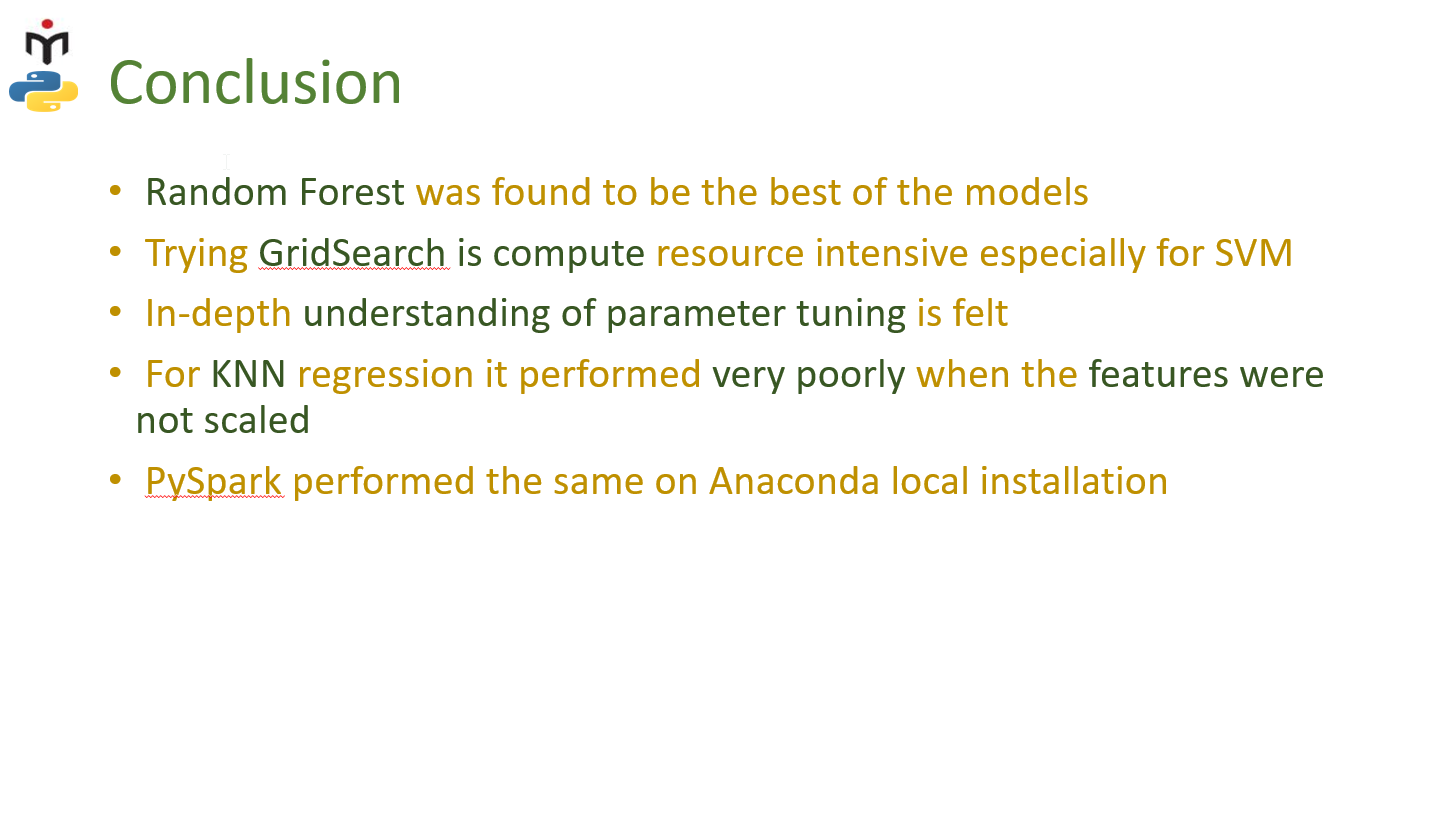